# Challenge 3

In [1]:
# import libraries here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Import the titanic file. Name your dataset `titanic`.

In [2]:
titanic = pd.read_csv('./titanic.csv',low_memory=False)
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes

In [3]:
#your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?

*Hint: Use Pandas `select_dtypes`*

In [4]:
# your code here- numerical variable
titanic.select_dtypes(include=['number']).head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250
3,4,1.0,1,35.0,1,0,53.1000
4,5,0.0,3,35.0,0,0,8.0500


In [5]:
#your code here- categorical variable
titanic.select_dtypes(include=['object']).head()

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S


#### Set the plot style to `classic` and the figure size to `(12,6)`

*Hint: To set the style you can use `matplotlib.pyplot` functions or seaborn*

In [6]:
# your code here
plt.style.use('classic')

In [7]:
plt.rcParams["figure.figsize"] = (12,6)

#### Use the appropriate visulalization to show the distribution of the column `Age`

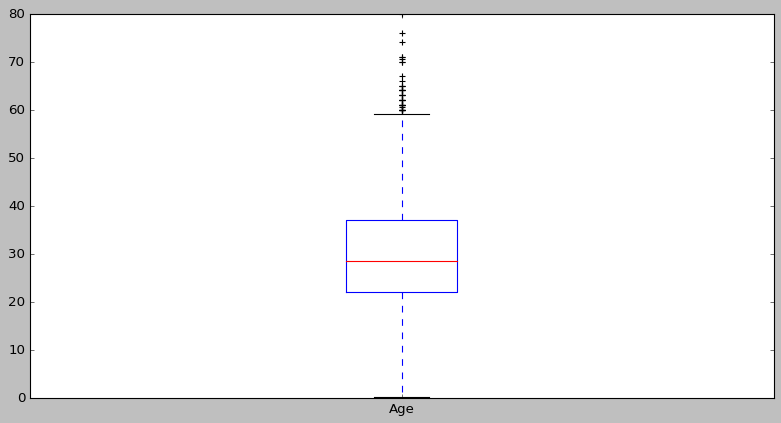

In [8]:
# your code here
titanic.Age.plot.box();

#### Use subplots to plot the distribution of the `Age` variable with bins equal to `10`, `20` and `50`.

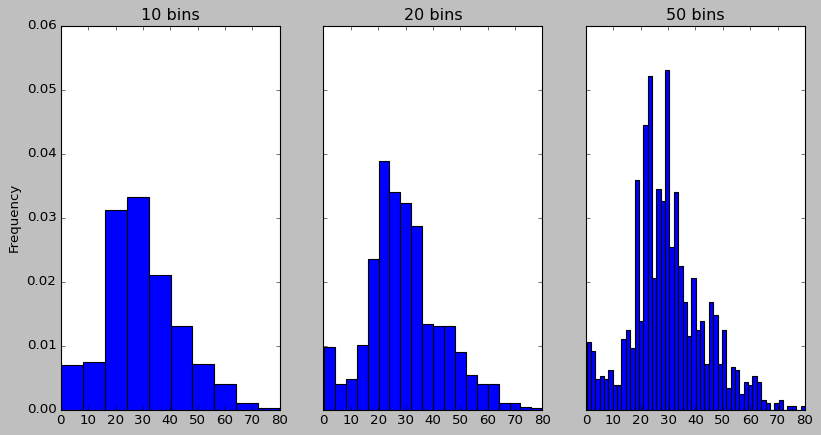

In [9]:
# your code here
fig, ax = plt.subplots(1,3, sharey=True)

nbins = [10, 20, 50]

for i, num in enumerate(nbins):
    plt.sca(ax[i])
    titanic.Age.plot(bins=num, density=True, kind='hist')
    plt.title(f'{num} bins')

#### Whether the bin size affects your plot? Why?

In [10]:
#your comment here
# Yes, the bin size affetcts the plot.

#### Use seaborn to show the distribution of the column `Age`

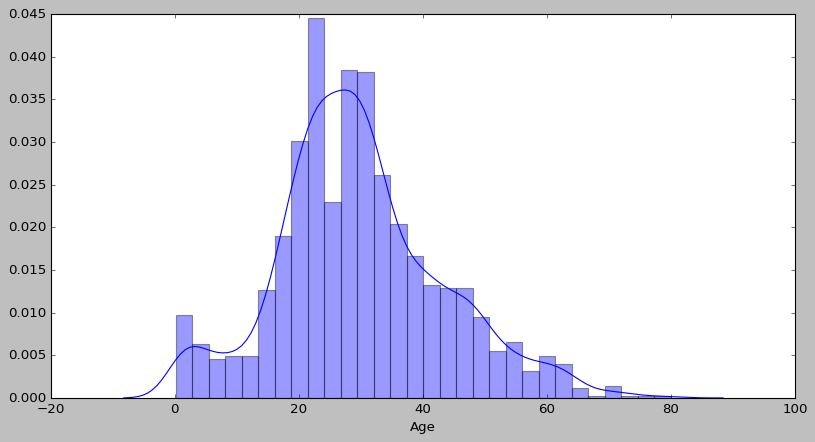

In [11]:
# your code here
sns.distplot(titanic.Age);

#### Use the appropriate plot to visualize the column `Gender`. There are 2 ways of doing it. Do it both ways.

*Hint: Use matplotlib and seaborn*

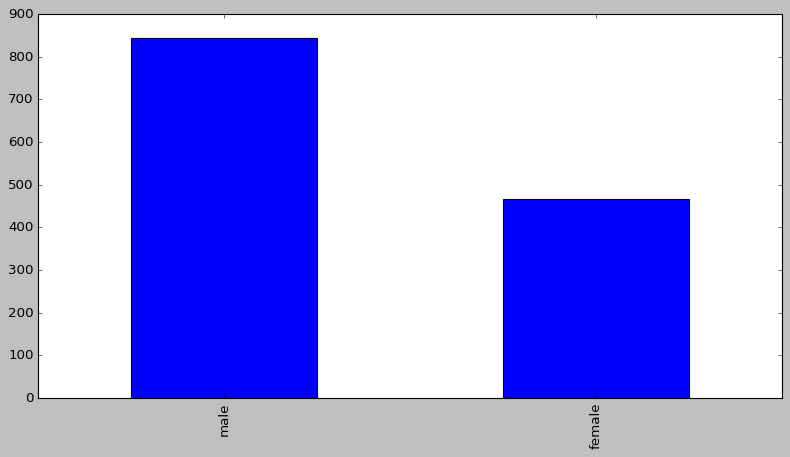

In [12]:
# your code here- 1st way
titanic.Gender.value_counts().plot(kind='bar');

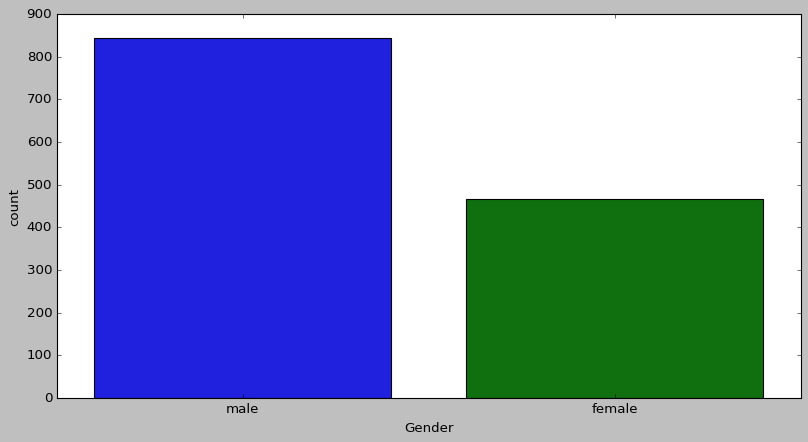

In [13]:
# your code here- 2nd way
sns.countplot(x='Gender', data=titanic);

#### Use the appropriate plot to visualize the column `Pclass` 


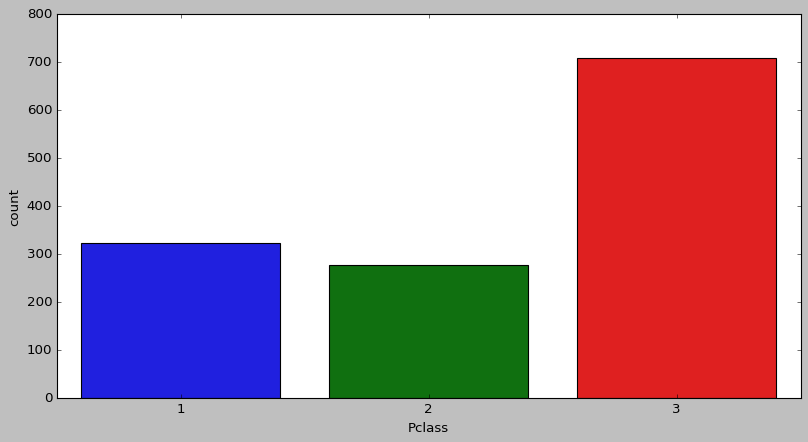

In [14]:
# your code here
sns.countplot(x='Pclass', data=titanic);

#### We would like to have in one single plot the summary statistics of the feature `Age`. Choose the appropriate plot to show below.

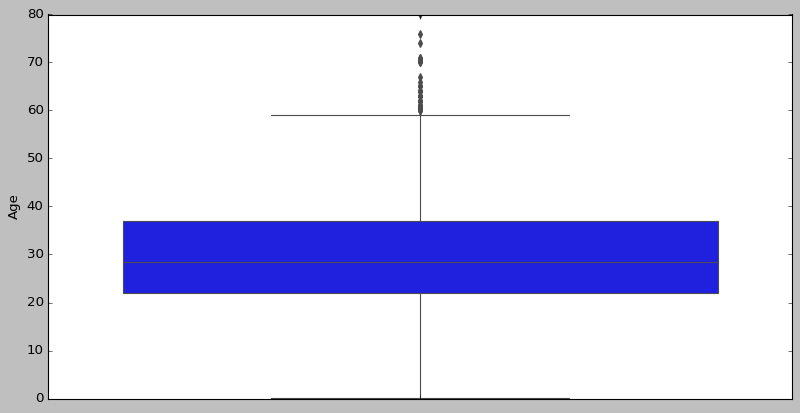

In [15]:
# your code here
sns.boxplot(y='Age', data=titanic);

#### What does the previous plot tell you about the feature `Age`? Comment.

In [16]:
# your comment here
# Median age is slighly below 30. Age data is skewed to the right and there are some outliers (age > 60)

#### Now in addition to the summary statistics, we also want to visualize the distribution of `Age`. Choose the appropriate plot to sow below.

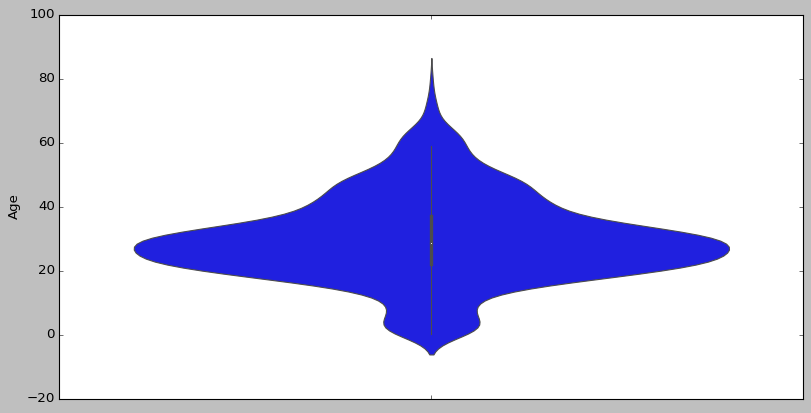

In [17]:
#your code here
sns.violinplot(y="Age", data=titanic);

#### What additional information in the previous plot provide you about the feature `Age`? Comment.

In [18]:
#your comment here


#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the appropriate plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.

*Hint: One of the ways involves using Seaborn*

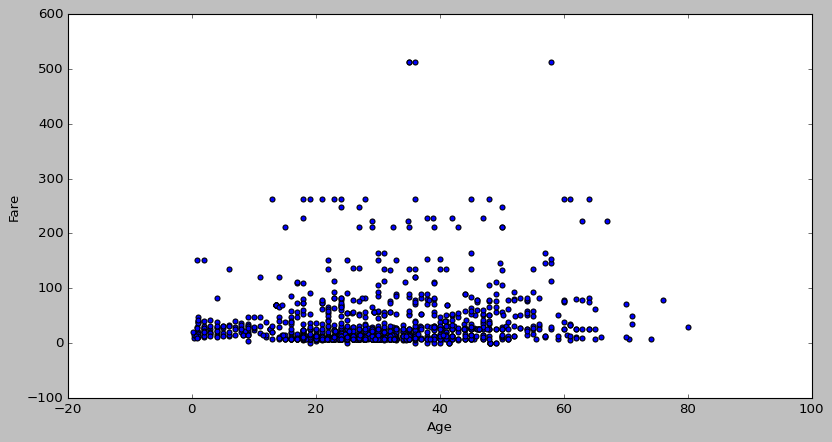

In [19]:
#your code-1st way
titanic.plot(x='Age', y='Fare', kind='scatter');

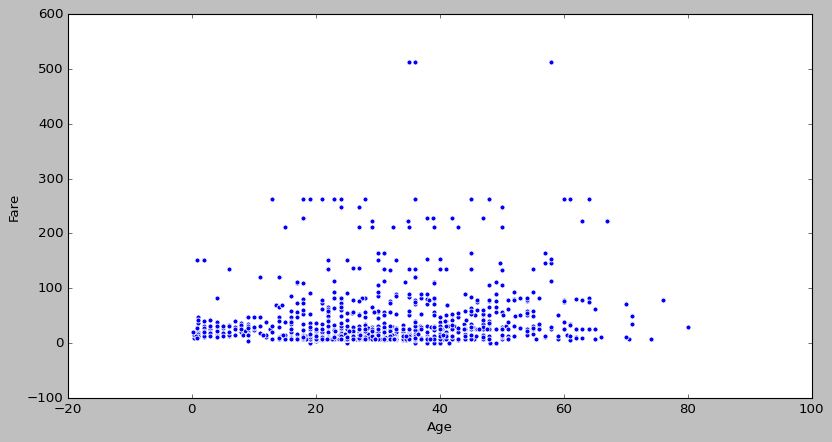

In [20]:
# your code-2nd way
sns.scatterplot(x='Age', y='Fare', data=titanic);

#### Using Seaborn plot the correlation matrix of various features.

*Hint: search how to use `heatmap`*

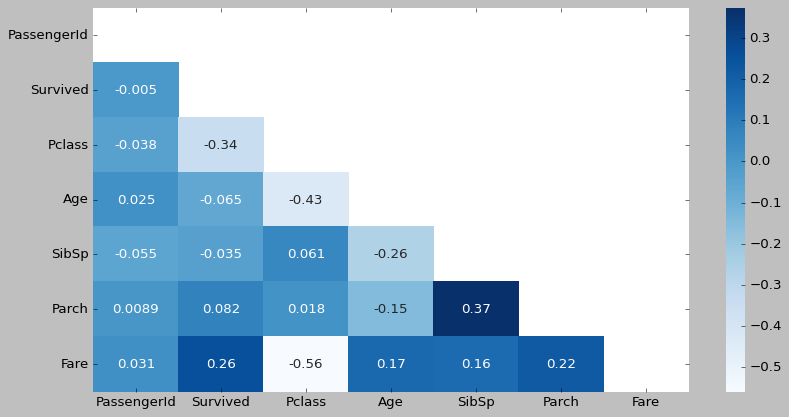

In [21]:
#your code here
correlation = titanic.corr()
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(correlation, cmap='Blues', annot=True, mask=mask);

#### According to the previous plot, what are the most correlated feature? Comment.

In [22]:
#your comment here
# The most correlated columns are SibSp & Parch, with a correlation of 0.37

#### Use the appropriate plot to display the summary statistics of the `Age` in function of the `Pclass`.

*Hint: use boxplot to display summary statistics of `Age` in relation to each of the discrete values of `Pclass`*

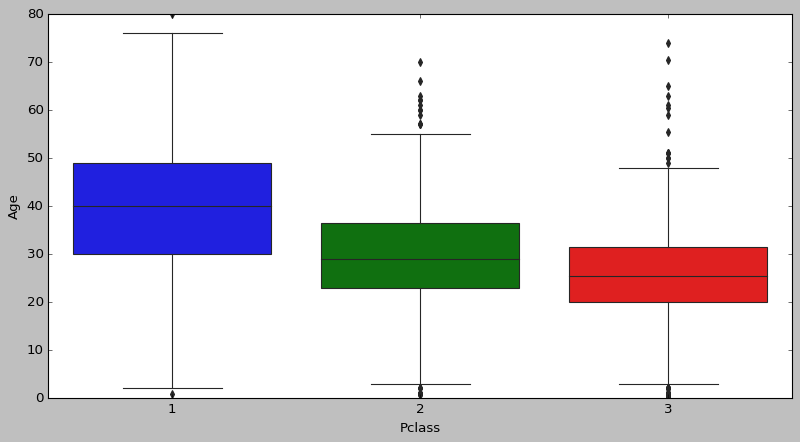

In [23]:
#your code here
sns.boxplot(x='Pclass', y='Age', data=titanic);

#### Use the appropriate plot to display the distributions of  `Age` in relation to  `Gender`.

*Hint: use Facetgrid to display the distribution of `Age` for each categorical value of `Gender`*

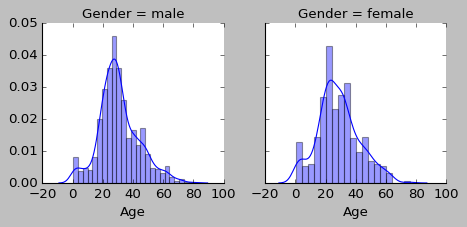

In [24]:
#your code here
g = sns.FacetGrid(data=titanic, col='Gender');
g.map(sns.distplot, 'Age');